In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [328]:
# load data
original_df = pd.read_csv('../../data/data_exploration_df.csv')

# make a copy
df = original_df.copy()

### functions

In [329]:
# function that takes in the events_to_analyze and returns the dataframes for each event with the lenght, number of NaN values, and print the names of the created dataframes
def create_event_dataframes(events_to_analyze, df):
    event_dataframes = {}
    for event in events_to_analyze:
        event_dataframes[event] = df[df['event.key'] == event]
        print(event, 'dataframe created')
    return event_dataframes

# function that creates a dataframe where event.key is a NaN value
def create_nan_event_dataframes(df):
    nan_event_df = df[df['event.key'].isna()]
    print('NaN event dataframe created')
    return nan_event_df

# function that takes in the event_dataframes nan_event_df and returns the lenght, number of NaN values for each column in each dataframe
def analyze_event_dataframes(event_dataframes, nan_event_df):
    for event in event_dataframes:
        print(event, 'dataframe')
        print('Lenght:', len(event_dataframes[event]))
        print('Number of NaN values:')
        print(event_dataframes[event].isna().sum())
        print('\n')
    print('NaN event dataframe')
    print('Lenght:', len(nan_event_df))
    print('Number of NaN values:')
    print(nan_event_df.isna().sum())

### variables

In [330]:
events_to_analyze = ['battery_info', 'crash_data']
columns_to_analyze = ['tracker.metric.bbatp','device.metric.dactualsp',	'device.metric.btemp']

### run functions

In [331]:
event_dataframes = create_event_dataframes(events_to_analyze, df)

battery_info dataframe created
crash_data dataframe created


In [332]:
nan_event_df = create_nan_event_dataframes(df)

NaN event dataframe created


In [333]:
analyze_event_dataframes(event_dataframes, nan_event_df)

battery_info dataframe
Lenght: 37754
Number of NaN values:
imei                           0
dtd                            0
tracker.metric.bbatp           0
device.metric.dactualsp    37754
device.metric.btemp        21031
event.key                      0
dtype: int64


crash_data dataframe
Lenght: 20320
Number of NaN values:
imei                           0
dtd                            0
tracker.metric.bbatp       20320
device.metric.dactualsp    20320
device.metric.btemp        20320
event.key                      0
dtype: int64


NaN event dataframe
Lenght: 535094
Number of NaN values:
imei                            0
dtd                            50
tracker.metric.bbatp       270336
device.metric.dactualsp    319743
device.metric.btemp        319608
event.key                  535094
dtype: int64


In [345]:
battery_info_df = event_dataframes['battery_info']
battery_info_df['imei'].value_counts()

868500050064237    7079
868500050058080    3430
868500050059781    1553
868500050061233    1104
868500050060516    1082
                   ... 
868500050066323       3
868500050063494       3
868500050063452       3
868500050061977       3
868500050058544       2
Name: imei, Length: 948, dtype: int64

In [346]:
# function that shows the describe() of all the events_to_analyze for each event and also for the nan_event_df
def describe_event_dataframes(event_dataframes, nan_event_df):
    for event in event_dataframes:
        print(event, 'dataframe')
        print(event_dataframes[event].describe())
        print('\n')
    print('NaN event dataframe')
    print(nan_event_df.describe())

In [347]:
describe_event_dataframes(event_dataframes, nan_event_df)

battery_info dataframe
               imei  tracker.metric.bbatp  device.metric.dactualsp  \
count  3.775400e+04          37754.000000                      0.0   
mean   8.685001e+14             87.656805                      NaN   
std    4.865396e+03             25.455468                      NaN   
min    8.685001e+14              0.000000                      NaN   
25%    8.685001e+14             92.000000                      NaN   
50%    8.685001e+14            100.000000                      NaN   
75%    8.685001e+14            100.000000                      NaN   
max    8.685001e+14            100.000000                      NaN   

       device.metric.btemp  
count         16723.000000  
mean              8.597620  
std               4.961491  
min               0.000000  
25%               7.000000  
50%               8.000000  
75%              11.000000  
max              36.000000  


crash_data dataframe
               imei  tracker.metric.bbatp  device.metric.dactu

battery_info dataframe


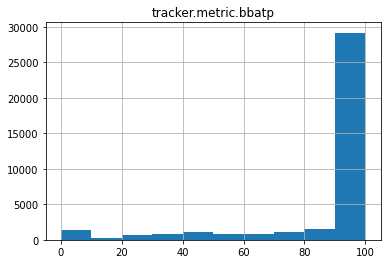

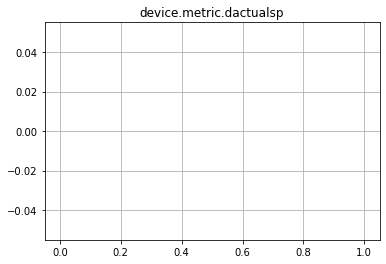

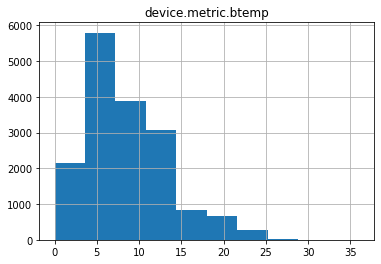

crash_data dataframe


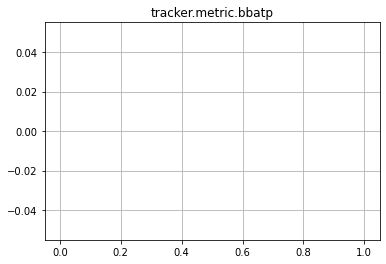

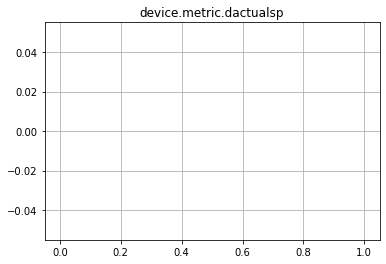

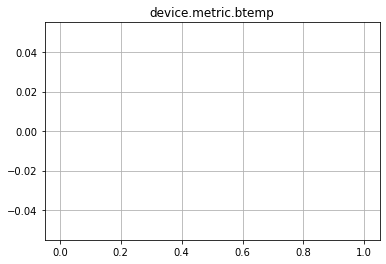

NaN event dataframe


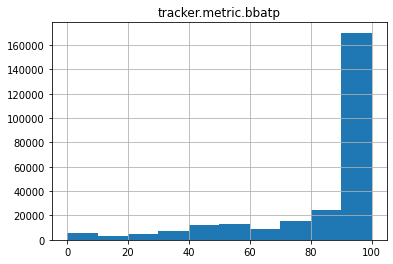

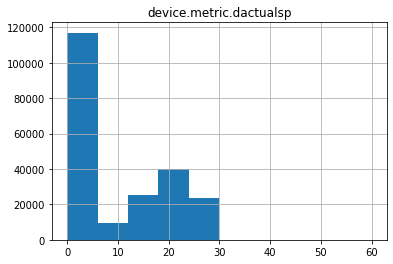

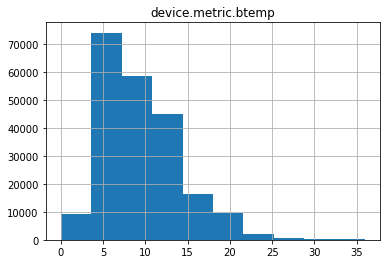

In [349]:
# function that plots the histograms of the columns_to_analyze for each event and also for the nan_event_df
def plot_histograms(event_dataframes, nan_event_df, columns_to_analyze):
    for event in event_dataframes:
        print(event, 'dataframe')
        for column in columns_to_analyze:
            event_dataframes[event][column].hist()
            plt.title(column)
            plt.show()
    print('NaN event dataframe')
    for column in columns_to_analyze:
        nan_event_df[column].hist()
        plt.title(column)
        plt.show()

plot_histograms(event_dataframes, nan_event_df, columns_to_analyze)